# Image Search

SentenceTransformers provides models that allow to embed images and text into the same vector space. This allows to find similar images as well as to implement image search.




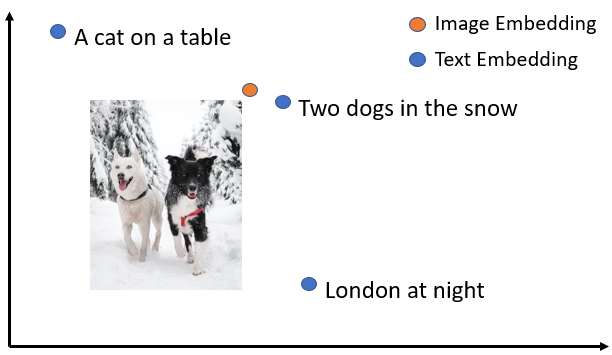

we use the OpenAI CLIP Model, which was trained on a large set of images and image alt texts.

https://github.com/openai/CLIP

we use the Unsplash Dataset Lite, which contains about 25k images.

https://unsplash.com/data

https://github.com/unsplash/datasets

http://sbert.net/datasets/

https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/unsplash-25k-photos.zip

In [1]:
%pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 4.7 MB/s 
     |████████████████████████████████| 5.8 MB 67.9 MB/s 
     |████████████████████████████████| 1.3 MB 66.9 MB/s 
     |████████████████████████████████| 182 kB 74.0 MB/s 
     |████████████████████████████████| 7.6 MB 66.1 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=634e5884c869d6c051310f3bb3aece739c4bab824b6f67180b566ec98741a62d
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [2]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import matplotlib.pyplot as plt
import glob
import torch 
import os

In [3]:
model = SentenceTransformer('clip-ViT-B-32')

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/316 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/605M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/389 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/604 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/961k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.88k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

In [4]:
!wget https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/unsplash-25k-photos.zip

--2022-12-26 14:16:03--  https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/unsplash-25k-photos.zip
Resolving public.ukp.informatik.tu-darmstadt.de (public.ukp.informatik.tu-darmstadt.de)... 130.83.167.186
Connecting to public.ukp.informatik.tu-darmstadt.de (public.ukp.informatik.tu-darmstadt.de)|130.83.167.186|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1922426838 (1.8G) [application/zip]
Saving to: ‘unsplash-25k-photos.zip’

unsplash-25k-photos 100%[===================>]   1.79G  15.9MB/s    in 2m 5s   

2022-12-26 14:18:09 (14.7 MB/s) - ‘unsplash-25k-photos.zip’ saved [1922426838/1922426838]



In [5]:
!unzip 'unsplash-25k-photos.zip' -d 'photos'

Streaming output truncated to the last 5000 lines.
  inflating: photos/ErnD0oSB9OE.jpg  
  inflating: photos/CLMlVwtPsI4.jpg  
  inflating: photos/7by0hnrUBP8.jpg  
  inflating: photos/XWARm1Wgg4U.jpg  
  inflating: photos/m_x26CPIjic.jpg  
  inflating: photos/Or9vxPAGtXw.jpg  
  inflating: photos/asr62h5w66w.jpg  
  inflating: photos/oPubZ53L5OE.jpg  
  inflating: photos/AENmGl9JVgs.jpg  
  inflating: photos/kR1Aer8c_WI.jpg  
  inflating: photos/YCniL3n_B7Q.jpg  
  inflating: photos/pg5CVv0FEBU.jpg  
  inflating: photos/jynDaAkI0H8.jpg  
  inflating: photos/QP64OlGcfcQ.jpg  
  inflating: photos/a_nu2fRoqwI.jpg  
  inflating: photos/HeerZLfH4h8.jpg  
  inflating: photos/7TGVEgcTKlY.jpg  
  inflating: photos/fN2pzLWtG6A.jpg  
  inflating: photos/lpxXl5Ssung.jpg  
  inflating: photos/yan5Aj6crIU.jpg  
  inflating: photos/9Phn7Dwz2PM.jpg  
  inflating: photos/9TRaDtl7Z5U.jpg  
  inflating: photos/QeZuoNqtj9I.jpg  
  inflating: photos/lLUbQBbf6Bc.jpg  
  inflating: photos/rmFs3k34JLI.jpg  

In [6]:
img_names = list(glob.glob('photos/*.jpg'))[:2000]
print(len(img_names))

2000


In [7]:
img_names[0]

'photos/xjUtcDvzDPk.jpg'

In [ ]:
# a = Image.open(img_names[0])
# a

In [8]:
img_embed = model.encode([Image.open(img) for img in img_names], batch_size=32, convert_to_tensor=True, show_progress_bar=True)

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

In [9]:
img_folder = '/photos'

def search(query, k=3):
  query_emd = model.encode([query], convert_to_tensor=True, show_progress_bar=False)

  hits = util.semantic_search(query_emd, img_embed, top_k=k)[0]
  print(hits)

  print("Query: ", query)
  for hit in hits:
    img_path = img_names[hit['corpus_id']]
    print(img_path)

    im = Image.open(img_path)
    plt.figure()
    plt.imshow(im)
    plt.show()

[{'corpus_id': 1930, 'score': 0.29164549708366394}, {'corpus_id': 1916, 'score': 0.28725525736808777}, {'corpus_id': 1105, 'score': 0.2864725589752197}]
Query:  man on the mountain
photos/H8-9t0vvWJA.jpg


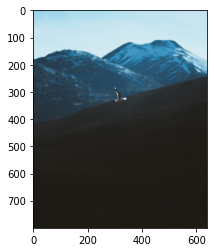

photos/L1G2AcunIro.jpg


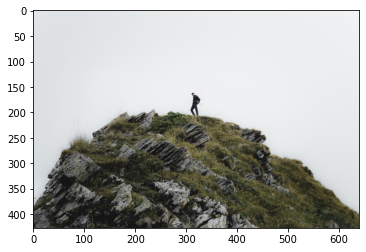

photos/IYuaxnKSfeI.jpg


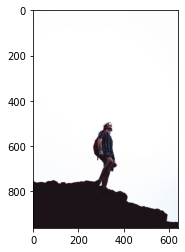

In [10]:
search('man on the mountain')

[{'corpus_id': 578, 'score': 0.28014785051345825}, {'corpus_id': 1159, 'score': 0.2783566415309906}, {'corpus_id': 1365, 'score': 0.27408406138420105}]
Query:  fire
photos/J7fvaRBwRvA.jpg


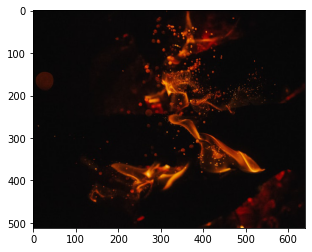

photos/l_Iuva4ULHQ.jpg


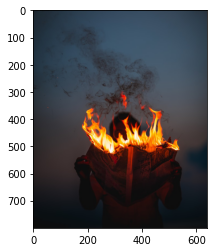

photos/6UJygvfoT2w.jpg


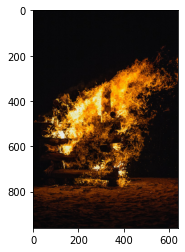

In [16]:
search('fire')

Original Image


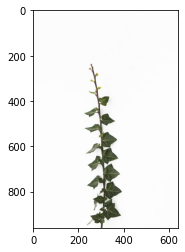


Search Results
[{'corpus_id': 1756, 'score': 1.0000001192092896}, {'corpus_id': 147, 'score': 0.8454023003578186}, {'corpus_id': 1037, 'score': 0.8387109637260437}]
Query:  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x960 at 0x7FBBF1257A00>
photos/mV3Ohihn8Qw.jpg


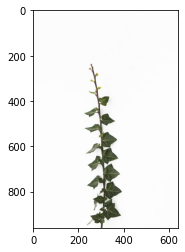

photos/TW5NJf2HhFk.jpg


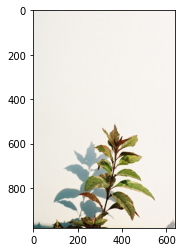

photos/I3xo-4LpcY4.jpg


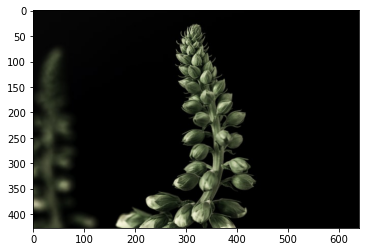

In [14]:
# img_names[794]
print("Original Image")
timg = Image.open(img_names[1756]) #1232
plt.figure()
plt.imshow(timg)
plt.show()
print("\nSearch Results")
search(Image.open(img_names[1756])) #1756